o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  x
o  C  C  C  C  C  C  C  C  C  C  T




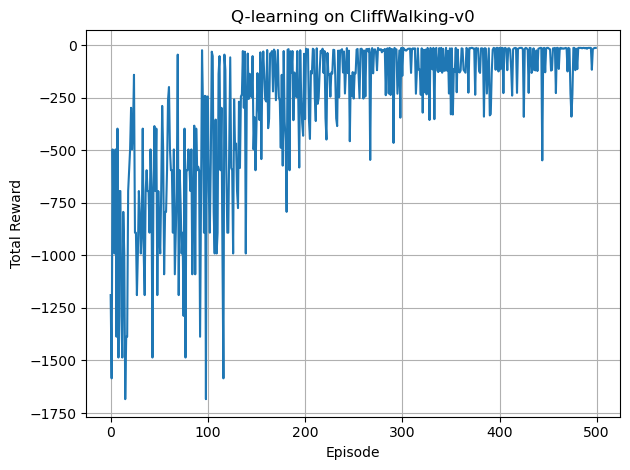


Final total reward: -13


In [51]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from IPython.display import clear_output

# Random seed for different behavior on each run
seed = int(time.time()) % (2**32)
np.random.seed(seed)
random.seed(seed)

# Create the environment with render_mode for compatibility
env = gym.make("CliffWalking-v0", render_mode="ansi")

# Initialize Q-table
n_states = env.observation_space.n
n_actions = env.action_space.n
Q = np.zeros((n_states, n_actions))

# Hyperparameters
alpha = 0.1       # Learning rate
gamma = 0.99      # Discount factor
epsilon = 1.0     # Exploration rate
epsilon_decay = 0.995
min_epsilon = 0.1
n_episodes = 500
max_steps = 100

# Track performance
rewards_per_episode = []

# Q-learning algorithm
for episode in range(n_episodes):
    state, _ = env.reset()
    total_reward = 0

    for step in range(max_steps):
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])        # Exploit

        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        # Update Q-value
        best_next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, best_next_action] - Q[state, action])

        state = next_state
        total_reward += reward

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    rewards_per_episode.append(total_reward)

# Run one final episode with rendering
state, _ = env.reset()
done = False
total_reward = 0
step = 0

while not done and step < max_steps:
    clear_output(wait=True)
    print(env.render())
    time.sleep(0.3)

    action = np.argmax(Q[state])
    next_state, reward, terminated, truncated, _ = env.step(action)
    done = terminated or truncated
    state = next_state
    total_reward += reward
    step += 1

# Plot performance
plt.plot(rewards_per_episode)
plt.title("Q-learning on CliffWalking-v0")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.tight_layout()
plt.show()



print("\nFinal total reward:", total_reward)